# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
pickle_file = 'notMNIST.pickle'

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =",  n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

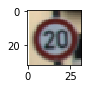

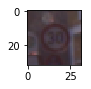

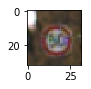

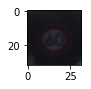

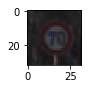

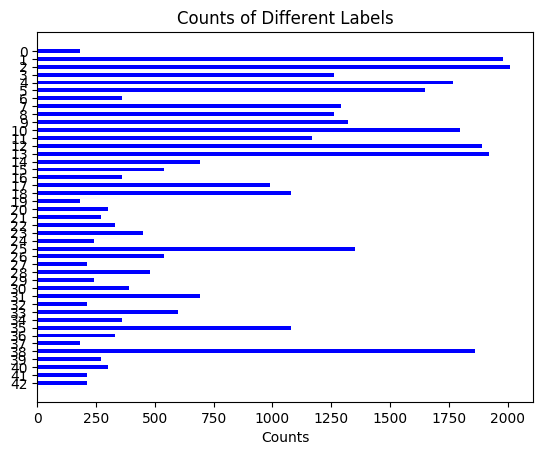

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

labels, indices, label_counts = np.unique(y_train, return_index=True, return_counts=True)

for i in range(5):
    fig = plt.figure(figsize=(1,1))
    plt.imshow(X_train[indices[i]])
    
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(labels, label_counts, height=0.5, align='center', color='blue')
ax.set_yticks(labels)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')
ax.set_title('Counts of Different Labels')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### convert to grayscale

import cv2

def grayscale(image_data):
    
    X_image_grayscale = np.zeros((image_data.shape[0], 32, 32))
    for i in range(image_data.shape[0]):
        X_image_grayscale[i] = cv2.cvtColor(image_data[i], cv2.COLOR_RGB2GRAY)
    return X_image_grayscale

X_train_grayscale = grayscale(X_train)
X_valid_grayscale = grayscale(X_valid)
X_test_grayscale = grayscale(X_test)

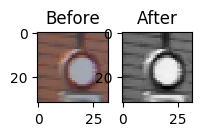

In [5]:
import random

index = random.randint(0, len(X_train))

fig = plt.figure(figsize=(2,2))

a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(X_train[index])
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(X_train_grayscale[index], cmap='gray')
a.set_title('After')


In [6]:
### Add the grayscale value as the 4th channel
X_train_grayscale = np.reshape(X_train_grayscale, (X_train_grayscale.shape[0], X_train_grayscale.shape[1], X_train_grayscale.shape[2], 1))
X_valid_grayscale = np.reshape(X_valid_grayscale, (X_valid_grayscale.shape[0], X_valid_grayscale.shape[1], X_valid_grayscale.shape[2], 1))
X_test_grayscale = np.reshape(X_test_grayscale, (X_test_grayscale.shape[0], X_test_grayscale.shape[1], X_test_grayscale.shape[2], 1))

X_train_grayscale = np.concatenate((X_train, X_train_grayscale), axis=3)
X_valid_grayscale = np.concatenate((X_valid, X_valid_grayscale), axis=3)
X_test_grayscale = np.concatenate((X_test, X_test_grayscale), axis=3)

In [7]:
### Normalize the data

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    img = np.array(image_data)
    xmin = np.amin(img)
    xmax = np.amax(img)
    img = a + (img - xmin)*(b-a)/(xmax-xmin)
    return img

X_train_grayscale = normalize_grayscale(X_train_grayscale)
X_valid_grayscale = normalize_grayscale(X_valid_grayscale)
X_test_grayscale = normalize_grayscale(X_test_grayscale)

X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    n_classes = 43
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 4, 6], mu, sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma)),
        'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma)),
        'wd2': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)),
        'out': tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([6], mu, sigma)),
        'bc2': tf.Variable(tf.truncated_normal([16], mu, sigma)),
        'bd1': tf.Variable(tf.truncated_normal([120], mu, sigma)),
        'bd2': tf.Variable(tf.truncated_normal([84], mu, sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes], mu, sigma))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])

    return out

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 128

rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
prediction = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_grayscale)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        X_train_grayscale, y_train = shuffle(X_train_grayscale, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x, batch_y = X_train_grayscale[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        #validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy = evaluate(X_valid_grayscale, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.688

EPOCH 2 ...
Validation Accuracy = 0.822

EPOCH 3 ...
Validation Accuracy = 0.839

EPOCH 4 ...
Validation Accuracy = 0.861

EPOCH 5 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.887

EPOCH 7 ...
Validation Accuracy = 0.894

EPOCH 8 ...
Validation Accuracy = 0.887

EPOCH 9 ...
Validation Accuracy = 0.900

EPOCH 10 ...
Validation Accuracy = 0.912

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.907

EPOCH 13 ...
Validation Accuracy = 0.916

EPOCH 14 ...
Validation Accuracy = 0.916

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.913

EPOCH 18 ...
Validation Accuracy = 0.915

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.920

Model saved


In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    training_accuray = evaluate(X_train_grayscale, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuray))
    
    test_accuracy = evaluate(X_test_grayscale, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 0.994
Test Accuracy = 0.899


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

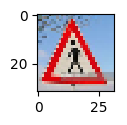

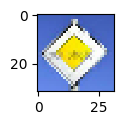

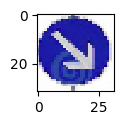

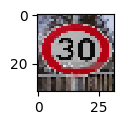

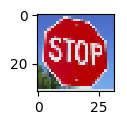

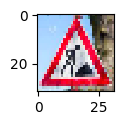

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

images_files = os.listdir("signs-from-web/")

X_test_images = np.zeros((6, 32,32,3), dtype=np.uint8)
images = []
images.append(mpimg.imread("signs-from-web/crossing.jpg"))
images.append(mpimg.imread("signs-from-web/priority.jpg"))
images.append(mpimg.imread("signs-from-web/right.jpg"))
images.append(mpimg.imread("signs-from-web/speed30.jpg"))
images.append(mpimg.imread("signs-from-web/stop.jpg"))
images.append(mpimg.imread("signs-from-web/work.jpg"))
for i in range(len(images)):
    resized_image = cv2.resize(images[i], (32, 32))
    resized_image = np.array(resized_image)
    X_test_images[i] = resized_image
    plt.figure(figsize=(1,1))
    plt.imshow(resized_image)
  
y_test_images = np.array([27, 12, 38, 1, 14, 25])


### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_test_images_grayscale = grayscale(X_test_images)

X_test_images_grayscale = np.reshape(X_test_images_grayscale, (X_test_images_grayscale.shape[0], X_test_images_grayscale.shape[1], X_test_images_grayscale.shape[2], 1))

X_test_images_grayscale = np.concatenate((X_test_images, X_test_images_grayscale), axis=3)

X_test_images_grayscale = normalize_grayscale(X_test_images_grayscale)

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.top_k(prediction, k=5), feed_dict={x: X_test_images_grayscale}) 

np.set_printoptions(precision = 2, suppress=True)
print (results.values)
print (results.indices)

[[ 0.99  0.01  0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 0.98  0.02  0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]]
[[27 18 24 11 26]
 [12 11 42 41 10]
 [38 20 36 28 13]
 [ 2  1 31 29  5]
 [14  1 17 13 28]
 [25 20 24 29 26]]


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_images_grayscale, y_test_images)
    print("Web Image Test Accuracy = {:.3f}".format(test_accuracy))

Web Image Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.top_k(prediction, k=5), feed_dict={x: X_test_images_grayscale}) 

print (results.values)
print (results.indices)


[[ 0.99  0.01  0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 0.98  0.02  0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]]
[[27 18 24 11 26]
 [12 11 42 41 10]
 [38 20 36 28 13]
 [ 2  1 31 29  5]
 [14  1 17 13 28]
 [25 20 24 29 26]]


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 